Necesitamos solucionar la ecuacion de Laplace, ya que no hay una densidad de carga dentro de la region. Por la simetia del problema, es conveniente solucionar la ecuacion de Laplace en coordenadas polares:

$$
\nabla ^2 V(r,\theta)=\frac{\partial ^2 V}{\partial r^2}+\frac{1}{r}\frac{\partial  V}{\partial r}+ \frac{1}{r^2}\frac{\partial^2 V}{\partial \theta^2}=0
$$

Usando las derivadas discretas:

$$
\frac{\partial ^2 V}{\partial r^2}=\frac{V(r+\Delta r,\theta)+V(r-\Delta r,\theta)-2V(r)}{\Delta r^2}
$$

$$
\frac{\partial  V}{\partial r}=\frac{V(r,\theta)-V(r-\Delta r,\theta)}{\Delta r}
$$


$$
\nabla ^2 V(r,\theta)=\frac{V(r+\Delta r,\theta)+V(r-\Delta r,\theta)-2V(r,\theta)}{\Delta r^2}+ \frac{1}{r}\frac{V(r,\theta)-V(r-\Delta r,\theta)}{\Delta r}+\frac{1}{r^2}\frac{V(r,\theta+\Delta \theta))+V(r,\theta-\Delta \theta)-2V(r,\theta)}{\Delta \theta^2}=0
$$

Factorizando $1/\Delta r^2$:

$$
\frac{1}{r^2} \bigg[V(r+\Delta r,\theta)+V(r-\Delta r,\theta)-2V(r,\theta)+ \frac{\Delta r}{r}\big( V(r,\theta)-V(r-\Delta r,\theta)\big)+ \frac{\Delta r^2}{r^2 \Delta \theta^2}\big(V(r,\theta+\Delta \theta))+V(r,\theta-\Delta \theta)-2V(r,\theta)\big) \bigg]=0
$$


Despejando $V(r,\theta)$ y definiendo el parametro $\lambda=\frac{\Delta r}{\Delta \theta}$:


$$
V(r,\theta)=\frac{V(r+\Delta r,\theta+(1-\frac{\Delta r}{r})V(r-\Delta r,\theta)+(\frac{\lambda}{r})^2 (V(r,\theta+\Delta \theta)+V(r,\theta-\Delta \theta))}{2-\frac{\Delta r}{r}+2 (\frac{\lambda}{r})^2} 
$$




In [1]:

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

In [2]:
N = 100   ## DEFINIR DISCRETIZACION 
r = np.linspace(0.01,10,N) 
phi = np.linspace(0,0.5*np.pi,N)
dr = r[1] - r[0]
dphi = phi[1] - phi[0]
lambda_ = dr/dphi


In [3]:
def InitV(): ##CONFIGURACION INICIAL
    
    V = np.zeros((N,N))
    
    for j in range(len(phi)):
        V[-1,j] = 100
    for i in range (len(r)):
        V[i,0] = 0  
        V[i,-1] = 0
            
        
    return V

<IPython.core.display.Javascript object>


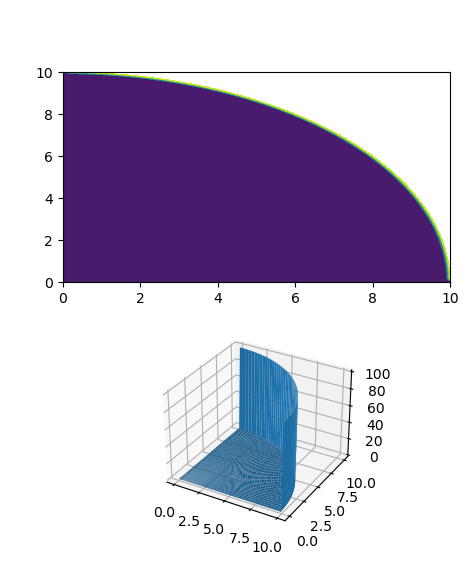

In [15]:
V=InitV()

fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212, projection='3d')

R, Phi = np.meshgrid(r,phi)

X,Y = R*np.cos(Phi),R*np.sin(Phi)


c = ax.contourf(X,Y,V.T)

ax1.plot_surface(X,Y,V.T)

In [22]:
def Iteracion(V,r,phi,Nit = int(1e5) ,tolerancia = 1e-5):##DIFERENCIAS FINITAS
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
    
        
        for i in range(1, len(r)-1):
            for j in range(1,len(phi)-1):
                
                
                if j == len(phi) - 1:
                    b = 1
                else:
                    b = j+1
                
                
                c = 2 - dr/r[i] + 2*(lambda_/r[i])**2
                
                tmp = V[i+1,j] + (1-dr/r[i])*V[i-1,j] + ((lambda_/r[i])**2)*(V[i,b] + V[i,j-1])
                tmp /= c
                

                cambio=V[i,j]-tmp
                V[i,j] = tmp
                
        
                if np.abs(cambio) > dmax:
                    dmax = cambio
     
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            
            itmax = it
            break
            
    return V,itmax
        


In [23]:
V = InitV()
Vf1,_ =  Iteracion(V,r,phi)

  2%|█▏                                                                        | 1584/100000 [01:10<1:13:30, 22.31it/s]

1584


<IPython.core.display.Javascript object>


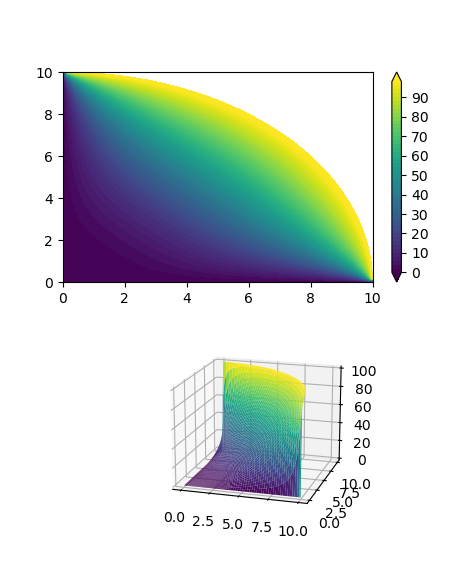

In [30]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212, projection='3d')

R, Phi = np.meshgrid(r,phi)

X,Y = R*np.cos(Phi),R*np.sin(Phi)


c = ax.contourf(X,Y,Vf1.T,levels=np.arange(0, 100, 2),extend='both')
fig.colorbar(c,ax=ax)
ax1.plot_surface(X,Y,Vf1.T,cmap='viridis')